<a href="https://colab.research.google.com/github/ninjaabhinav/classical-ml-projects/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

In [19]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df.shape

(200, 5)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,43.345000,54.110000,49.960000
std,57.879185,15.919899,17.769261,15.906397
min,1.000000,18.000000,15.000000,3.000000
25%,50.750000,27.000000,41.500000,42.000000
50%,100.500000,45.000000,62.000000,50.000000
75%,150.250000,57.000000,69.000000,57.000000
max,200.000000,70.000000,73.000000,99.000000


In [23]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


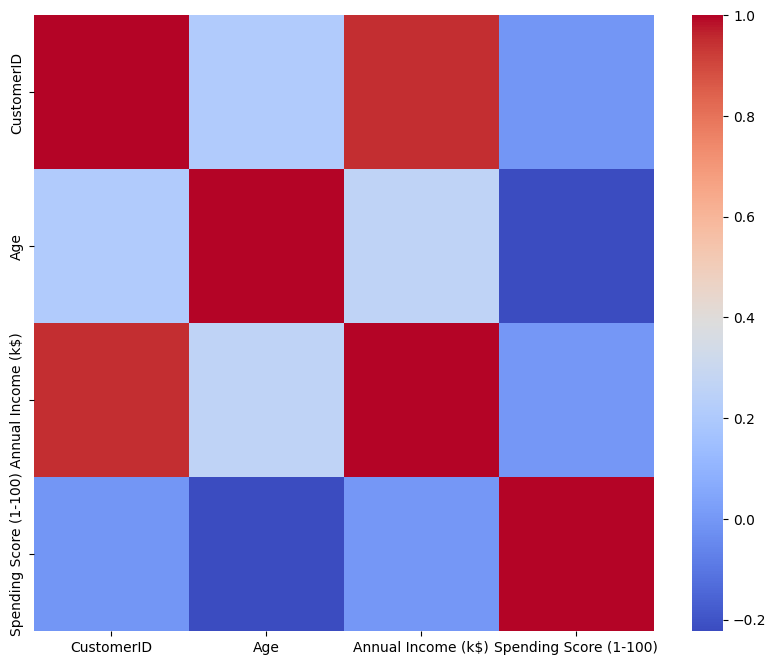

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=False, cmap='coolwarm')
plt.show()

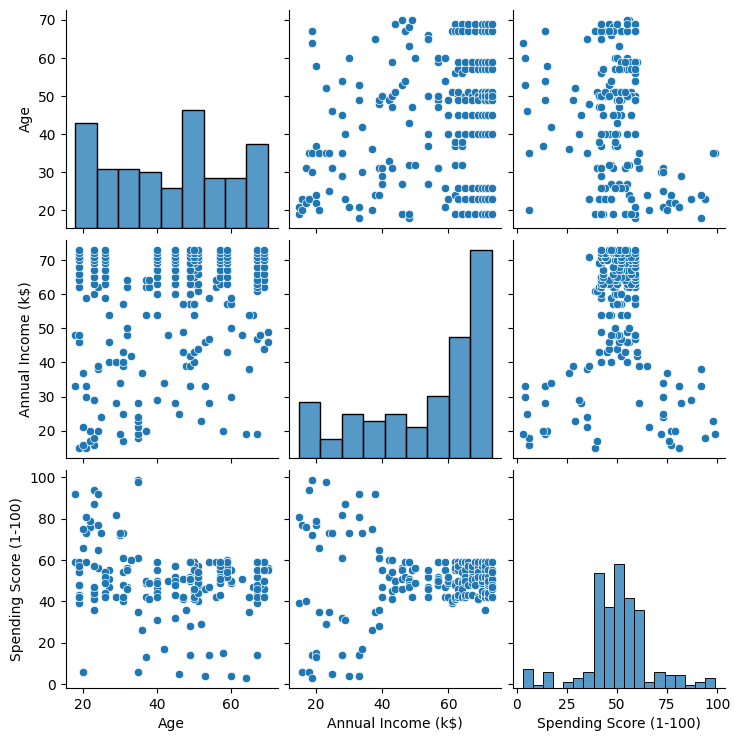

In [25]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()

In [26]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

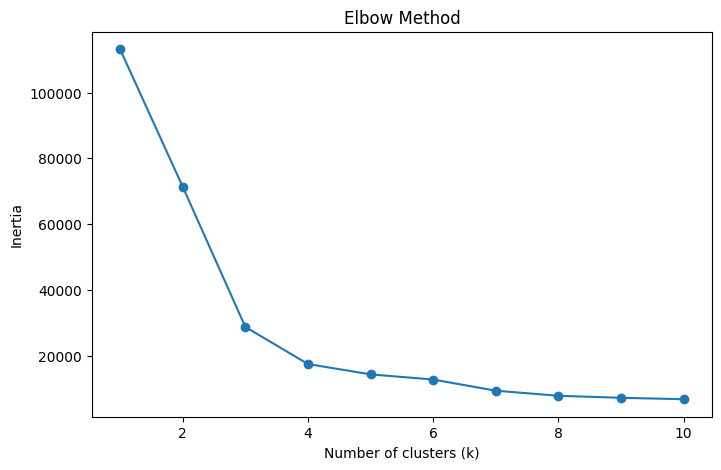

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1,11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [28]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


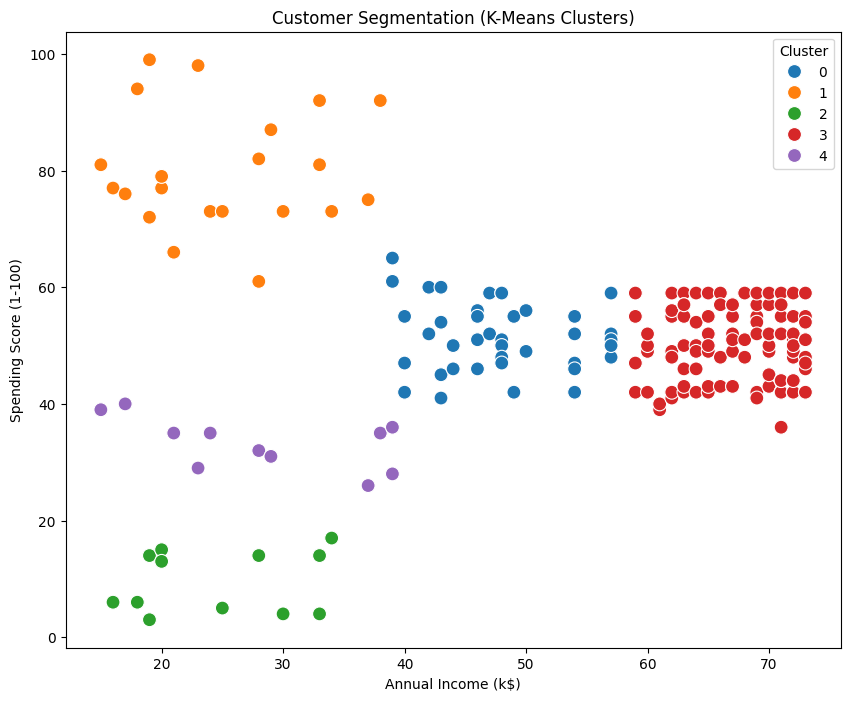

In [29]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='tab10',
    s=100
)

plt.title("Customer Segmentation (K-Means Clusters)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [30]:
centers = kmeans.cluster_centers_
centers

array([[47.9047619 , 51.19047619],
       [25.0952381 , 80.04761905],
       [24.58333333,  9.58333333],
       [67.35087719, 49.8245614 ],
       [28.18181818, 33.27272727]])

In [31]:
centers = pd.DataFrame(kmeans.cluster_centers_,
                       columns=['Annual Income (k$)', 'Spending Score (1-100)'])
centers

,Annual Income (k$),Spending Score (1-100)
0,47.904762,51.190476
1,25.095238,80.047619
2,24.583333,9.583333
3,67.350877,49.824561
4,28.181818,33.272727


In [32]:
cluster_labels = {
    0: "High Income, High Spending (Premium Customers)",
    1: "Low Income, Low Spending (Budget Customers)",
    2: "High Income, Low Spending (Cautious Customers)",
    3: "Low Income, High Spending (Impulsive Buyers)",
    4: "Mid Income, Mid Spending (Average Customers)"
}

df['Cluster_Label'] = df['Cluster'].map(cluster_labels)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_Label
0,1,Male,19,15,39,4,"Mid Income, Mid Spending (Average Customers)"
1,2,Male,21,15,81,1,"Low Income, Low Spending (Budget Customers)"
2,3,Female,20,16,6,2,"High Income, Low Spending (Cautious Customers)"
3,4,Female,23,16,77,1,"Low Income, Low Spending (Budget Customers)"
4,5,Female,31,17,40,4,"Mid Income, Mid Spending (Average Customers)"


In [34]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Annual Income (k$)','Spending Score (1-100)'])
print("Cluster centers:\n", centers)

print("\nCluster sizes:")
print(df['Cluster'].value_counts().sort_index())

cluster_labels = {
    0: "High Income, High Spending",
    1: "Low Income, Low Spending",
    2: "High Income, Low Spending",
    3: "Low Income, High Spending",
    4: "Mid Income, Mid Spending"
}
df['Cluster_Label'] = df['Cluster'].map(cluster_labels)
df.groupby('Cluster_Label')[['Annual Income (k$)','Spending Score (1-100)']].mean()


Cluster centers:
    Annual Income (k$)  Spending Score (1-100)
0           47.904762               51.190476
1           25.095238               80.047619
2           24.583333                9.583333
3           67.350877               49.824561
4           28.181818               33.272727

Cluster sizes:
Cluster
0     42
1     21
2     12
3    114
4     11
Name: count, dtype: int64


,Annual Income (k$),Spending Score (1-100)
Cluster_Label,,
"High Income, High Spending",47.904762,51.190476
"High Income, Low Spending",24.583333,9.583333
"Low Income, High Spending",67.350877,49.824561
"Low Income, Low Spending",25.095238,80.047619
"Mid Income, Mid Spending",28.181818,33.272727
